**Ангелина, привет!**

Это — Алексей Каргин, рад снова поработать вместе! Я буду проверять проект **Анализ активности пользователей сервиса "Яндекс Книги" из Москвы и Санкт-Петербурга**. 

Всё как всегда — при ревью проекта будут отмечены положительные моменты, акцентировано внимание на возможных улучшениях или рекомендациях.

Для удобства я оставлю комментарии в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». Пожалуйста, не перемещай, не изменяй и не удаляй их — так наше общение будет более продуктивным. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера</b> 
    
✍ Так выделены самые важные замечания. Без их отработки проект не будет принят. При проверке я обращаю внимание не только на код, но и на интерпретацию и анализ результатов.
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера</b> 
    
📝 Так выделены небольшие замечания или рекомендации. Постарайся, пожалуйста, учесть эти комментарии в этом проекте или в будущих проектах.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера</b> 
    
👍 Так выделены все остальные комментарии, включая рекомендации, позитивные моменты или какие-то рассуждения и пояснения.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
Например, вот так. Также, если есть какие-то вопросы, или что-то осталось непонятным по ревью - спрашивай в таких блоках и я постараюсь дать ответ.
</div>

---

<div class="alert alert-success">
<b>Обратная связь v.1</b> 
    
👋 Ангелина, спасибо, что прислала проект! В целом по тесту все хорошо, данные получены верные, то проект может быть принят! Посмотри, пожалуйста, ниже у меня было несколько рекомендаций. Если остались вопросы или комментарии, то их можно передать мне через куратора. 
    
Отличного окончания обучения!
    
<br>    
С наилучшими пожеланиями, <br>
Алексей
</div>

---

# Анализ среднего времени активности пользователей в Москве и Санкт-Петербурге

- Автор: Торгашина Ангелина
- Дата: 12.03.2025

## Цели и задачи проекта

Цель проекта: Проверить статистическую гипотезу о том, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы, и предоставить аналитическую записку с результатами анализа.

Задачи проекта:

- Загрузить и подготовить данные
- Проверить наличие дубликатов в идентификаторах пользователей и обработать их (при необходимости)
- Сравнить размеры групп, их статистики и распределение
- Проверить гипотезы
- Выбрать подходящий тип t-теста для односторонней проверки гипотезы
- Определить уровень статистической значимости
- Провести t-тест
- Получить p-value
- Интерпретировать результы и сделать выводы:
- Составить аналитическую записку

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Отлично! Начало положено, цель понятная, содержит формулировку проверяемой продуктовой гипотезы, перечислены основные задачи. Все по делу.
    
</div>

## Описание данных

city - город

puid - идентификатор пользователя

hours - суммарное количество часов, проведенных пользователем на платформе

## Содержимое проекта

1. Загрузка данных и знакомств с ними
2. Проверка гипотезы в Python
3. Аналитическая записка

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Хорошо, когда импорт библиотек в начале проекта — это соответствует стилю [PEP8](https://www.python.org/dev/peps/pep-0008/) и помогает понять, какое окружение необходимо для запуска проекта.

</div>

In [2]:
df = pd.read_csv('/datasets/yandex_knigi_data.csv')

In [3]:
df.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [4]:
df = df.drop('Unnamed: 0', axis=1)

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Верно — это поле артефакт после выгрузки данных в csv, оно дублирует индекс. Его лучше удалить, так как оно не позволит найти полные дубликаты строк.

</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8784 non-null   object 
 1   puid    8784 non-null   int64  
 2   hours   8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.0+ KB


In [6]:
df_sorted = df.sort_values(by=df.columns.tolist())
quantity_of_dup=df_sorted.duplicated().sum()
print(f'Количество полных дубликатов:{quantity_of_dup}')

Количество полных дубликатов:0


In [7]:
df_sorted = df.sort_values(by=df.columns.tolist())
quantity_of_dup=df_sorted.duplicated(subset='puid').sum()
print(f'Количество дубликатов (одинаковые айди):{quantity_of_dup}')

Количество дубликатов (одинаковые айди):244


In [8]:
df_sorted = df.sort_values(by=df.columns.tolist())
quantity_of_dup=df_sorted.duplicated(subset=['puid','city']).sum()
print(f'Количество дубликатов (уникальные сочетания айди+город):{quantity_of_dup}')

Количество дубликатов (уникальные сочетания айди+город):0


промежуточный вывод: пропуски не были найдены. полные дубликаты не были найдены. было обнаружено, что одни и те же пользователи (122 человека) читали, находясь и в Москве, и в Петербурге. однако, проверив уникальные сочетания айди и города обнаруживаем, что дубликатов нет.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Тут все верно по действиям — данные проверены на наличие дубликатов и ошибок. В целом, поскольку тест предполагается делать независимым, то лучше пользователей, которые попали в две группы исключить из выборки полностью. 

</div>

In [9]:
df[df['city']=='Москва']['hours'].describe() #рассмотрим статистики столбца часы в Москве

count    6234.000000
mean       10.881092
std        36.851683
min         0.000018
25%         0.059903
50%         0.924498
75%         5.939972
max       857.209373
Name: hours, dtype: float64

In [10]:
df[df['city']=='Санкт-Петербург']['hours'].describe() #рассмотрим статистики столбца часы в Санкт-Петербурге

count    2550.000000
mean       11.592691
std        39.704993
min         0.000025
25%         0.080002
50%         0.984781
75%         6.509072
max       978.764775
Name: hours, dtype: float64

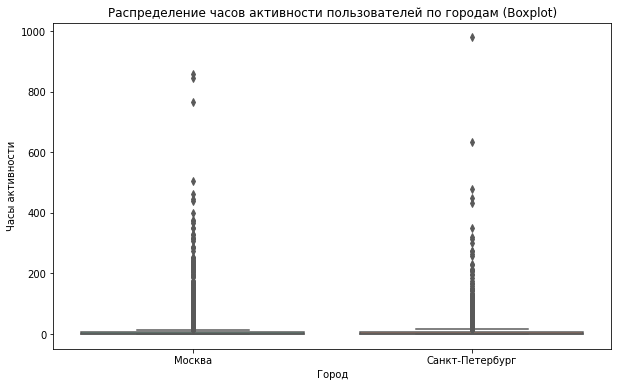

In [11]:
# Создание boxplot с Seaborn
plt.figure(figsize=(10, 6))  # Настройка размера графика (опционально)
sns.boxplot(x='city', y='hours', data=df, palette='Set2')  # palette для выбора цветов

plt.title('Распределение часов активности пользователей по городам (Boxplot)')
plt.xlabel('Город')
plt.ylabel('Часы активности')

plt.show()

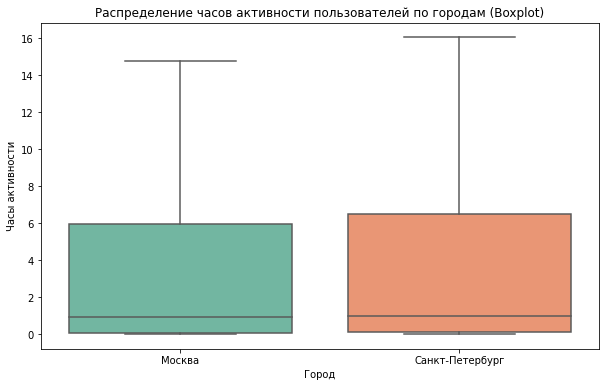

In [12]:
# Создание boxplot с Seaborn
plt.figure(figsize=(10, 6))  # Настройка размера графика (опционально)
sns.boxplot(x='city', y='hours', data=df, palette='Set2', showfliers=False)  # palette для выбора цветов

plt.title('Распределение часов активности пользователей по городам (Boxplot)')
plt.xlabel('Город')
plt.ylabel('Часы активности')

plt.show()

вывод: 
- после быстрого анализа статистик и распределния можно заметить, что выборки отличаются. в Москве число наблюдений больше, чем в Петербурге почти в 2,5 раза. 
- однако основные статистики больше в Санкт-Петербурге.
- также можем заметить, что распределение данных сопровождается огромным количеством выбросов, что может искажать основные статистики
- если рассмотреть эти же данные без выбросов, то видим, что размах и межквартильный разброс выше в Петербурге. в том числе максимум проведенных часов наблюдаем в Санкт-Петербурге.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Отлично! Статистика по городам была изучена верно. Да, в данных есть высокие значения, некоторые из них можно рассматривать как выбросы. Но в подобных случаях всегда будут пользователи, которые больше других покупают, смотрят, слушают и читают. Иногда на них держится продукт. 

Тут важно сравнить группы между собой - такие высокие значения есть в двух группах, а другие статистические показатели близки. Т.е. в целом группы сходи между собой по величине разброса данных. Однако большая дисперсия будет негативно влиять на результат стат теста — чем меньше различие в средних при большой дисперсии, тем больше необходимо собрать наблюдений, чтобы провести тест с высокой мощностью.


</div>

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 
    
📝 При одностороннем тесте в качестве нулевой гипотезы лучше не приводить гипотезу о равенстве, так как одна из групп может быть меньше. Т.е. тут лучше указать такие гипотезы:
    
**Нулевая гипотеза H₀**: Средняя активность пользователей в Санкт-Петербурге не выше, чем средняя активность пользователей в Москве

**Альтернативная гипотеза H₁**: Средняя активность пользователей в Санкт-Петербурге выше, чем средняя активность пользователей в Москве 
    
Т.е. при одностороннем тесте мы проверяем, что одна выборка больше или нет, но это не значит, что выборки равны. Одна группа может показывать стат. значимое снижение метрики. В конце проекта покажу пример.
</div>

In [13]:
group_a = df[df['city']=='Москва']['hours']
group_b = df[df['city']=='Санкт-Петербург']['hours']

statistic, p_value = st.ttest_ind(group_a, group_b, alternative='less', equal_var=False)
print(f'pvalue={round(p_value,2)}') # Выведите полученное p-value 
# Интерпретируем p-value
alpha = 0.05  # Уровень значимости 
if p_value < alpha:
    print("P-value меньше уровня значимости. Отвергаем нулевую гипотезу о равенстве средних.  Различия в средней активности пользователей в часах между группами A и B статистически значимы.")
else:
    print("P-value больше уровня значимости. Не отвергаем нулевую гипотезу о равенстве средних. Нет статистически значимых различий в средней активности пользователей в часах между группами A и B.")

pvalue=0.22
P-value больше уровня значимости. Не отвергаем нулевую гипотезу о равенстве средних. Нет статистически значимых различий в средней активности пользователей в часах между группами A и B.


<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Технически тест выполнен корректно. Возможно стоит поменять местами группы в параметрах теста и поставить направление `greater`, чтобы тест больше соответствовал гипотезе, а то получается, что мы проверяем не ту гипотезу, которая была выше, а то, что в Москве средняя активность ниже. Понятно, что результат по смыслу не поменяется, но все же. 
    
Формально по результатам теста мы можем говорить, что среднее время в Москве не ниже, чем в Санкт-Петербурге. Но при таком результате `p-value` (когда оно в диапазоне `0.05-0.95`) мы можем говорить о равенстве средних в двух группах, но если бы `p-value` было бы `больше 0.95` и приближалось бы к единице, тогда о равенстве средних стоит говорить аккуратнее.

</div>

## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



выводы по проекту:
- был выбран t-тест Уэлча. хоть и различия в дисперсиях нам известны и не сильно отличаются, вариация этого теста буждет более универсальной.

<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 
    
📝 Тут осталось не ясным — тест Уэлча лучше использовать, когда было сравнение дисперсий и мы точно знаем, что они различаются. Например, проведи тест Левене https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html 
    
В другом случае лучше использовать критерий Стьюдента.
   

</div>


- уровень статистической значимости был выбран на уровне 0.05. этого будет достаточно для выявления статистически значимых отличий в средней активности пользователей в часах.
- p-value=0.22, что больше 0.05, это значит, что нет статистически значимых различий в средней активности пользователей в часах между группами из Москвы и Санкт-Петербурга.
- хоть и при анализе основых статистик выборок мы видели, что сатистики Санкт-Петербурга больше, тест не обнаружил в них статистическую важность. это логично, так как различия в статистиках несущественно большие.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Выводы верные. Действительно, активность в Санкт-Петербурге не выше, чем в Москве, а при таком `p-value=0.22` можно говорить, что такая же.
    
</div>

---



<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 В качестве общей информации про равенство стредних при односторонней гипотезе: Могут быть случаи, когда мы проверяем гипотезу, что во второй группе значение выше, но оно может быть меньше (когда мы не знаем результатов и формулируем гипотезы). Тут важно следить за p-value. Если при проверке гипотезы, что метрика выше, мы получаем p-value в диапазоне от 0.05 до 0.95, то выборки равные по средним. А если при проверке гипотезы о том, что значение выше, p-value в диапазоне 0.95 до 1 (приближается), то вторая выборка будет стат. ниже, если бы мы проверяли альтернативную гипотезу, что значение ниже. И тогда мы не можем говорить о равенстве средних, принимая нулевую гипотезу.

Давай посмотрим на примере: создадим две выборки `A` и `В`. В `A` среднее ниже, чем в `В`. Проверяем одностороннюю гипотезу, что среднее в `A` выше, чем в `В`.
    
</div>

In [14]:
# Ячейка ревьюера
import numpy as np
import pandas as pd

np.random.seed(42)

# Генерация данных — активность в группе А ниже, чем в В
a = np.random.normal(loc=100, scale=15, size=5000) 
b = np.random.normal(loc=101, scale=15, size=5000) 

# Тест о том, что А выше В, но нулевую гипотезу формулируем, что всегда средние равны: среднее А = среднее В
t_stat, p_value = st.ttest_ind(a, b, alternative='greater')
print("Отвергаем нулевую гипотезу" if p_value < 0.05 else "Не отвергаем нулевую гипотезу", "p_value =", p_value)

Не отвергаем нулевую гипотезу p_value = 0.9946166372612336


<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Понятное дело (по исходным данным), среднее не выше, поэтому не отвергаем нулевую гипотезу. И если бы гипотеза нулевая была бы всегда о равенстве, тогда мы бы сделали вывод — средние в `A` и `В` равны.
    
Но проверим, обратную гипотезу, что среднее в `А` ниже:
    
</div>

In [15]:
# Тест о том, что А ниже В, но нулевую гипотезу формулируем, что всегда средние равны: среднее А = среднее В
t_stat, p_value = st.ttest_ind(a, b, equal_var=False, alternative='less')
print("Отвергаем нулевую гипотезу" if p_value < 0.05 else "Не отвергаем нулевую гипотезу", "p_value =", p_value)

Отвергаем нулевую гипотезу p_value = 0.005383364167850398


<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Действительно, среднее в `A` ниже. Поэтому, в примере выше мы могли бы неверно сделать вывод, сказав, что выборки равны по средним. Поэтому, если `p-value` при односторонней проверке оно выше `0.95`, значит получаем противополжный результат и о равенстве средних не можем говорить.
    
</div>